In [ ]:
import pandas as pd

Method .append() dapat digunakan pada dataframe/series yang ditujukan untuk menambah row-nya saja.

In [ ]:
s1 = pd.Series([1,2,3,4,5,6])
s2 = pd.Series(["a","b","c","d","e","f"])
s2_append_s1 = s2.append(s1)
print("Series - append:\n", s2_append_s1)

Series - append:
 0    a
1    b
2    c
3    d
4    e
5    f
0    1
1    2
2    3
3    4
4    5
5    6
dtype: object


In [ ]:
df1 = pd.DataFrame({'a':[1,2],
		   'b':[3,4]})
df2 = pd.DataFrame({'b':[1,2],
		   'a':[3,4]})
df2_append_df1 = df2.append(df1)
print("Dataframe - append:\n", df2_append_df1)

Dataframe - append:
    b  a
0  1  3
1  2  4
0  3  1
1  4  2


In [ ]:
df1 = pd.DataFrame({'a':[1,2],
					'b':[3,4]})
df2 = pd.DataFrame({'b':[1,2],
					'a':[3,4]})

row_wise_concat = pd.concat([df2, df1])
print("Row-wise - concat:\n", row_wise_concat)
col_wise_concat = pd.concat([df2, df1], axis=1)
print("Column-wise - concat:\n", col_wise_concat)
multiindex_concat = pd.concat([df2,df1], axis=0, keys=['df1','df2'])
print("Multiindex - concat:\n", multiindex_concat)


Row-wise - concat:
    b  a
0  1  3
1  2  4
0  3  1
1  4  2
Column-wise - concat:
    b  a  a  b
0  1  3  1  3
1  2  4  2  4
Multiindex - concat:
        b  a
df1 0  1  3
    1  2  4
df2 0  3  1
    1  4  2


Method .concat() dapat digunakan pada dataframe yang ditujukan untuk penggabungan baik dalam row-wise (dalam arah ) atau column-wise.

In [ ]:
df1 = pd.DataFrame({
   'key':['k1','k2','k3','k4','k5'],
   'val1':[200, 500, 0, 500, 100],
   'val2':[30, 50, 100, 20, 10]
})
df2 = pd.DataFrame({
   'key':['k1','k3','k5','k7','k10'],
   'val3':[1,2,3,4,5],
   'val4':[6,7,8,8,10]
})

In [ ]:
merge_df_left = pd.merge(left=df2, right=df1, how='left', left_on='key', right_on='key')
print('Merge - Left:\n', merge_df_left)

Merge - Left:
    key  val3  val4   val1   val2
0   k1     1     6  200.0   30.0
1   k3     2     7    0.0  100.0
2   k5     3     8  100.0   10.0
3   k7     4     8    NaN    NaN
4  k10     5    10    NaN    NaN


In [ ]:
merge_df_right = pd.merge(left=df2, right=df1, how='right', left_on='key', right_on='key')
print('Merge - Right:\n', merge_df_right)

Merge - Right:
   key  val3  val4  val1  val2
0  k1   1.0   6.0   200    30
1  k2   NaN   NaN   500    50
2  k3   2.0   7.0     0   100
3  k4   NaN   NaN   500    20
4  k5   3.0   8.0   100    10


In [ ]:
merge_df_inner = pd.merge(left=df2, right=df1, how='inner', left_on='key', right_on='key')
print('Merge - Inner:\n', merge_df_inner)

Merge - Inner:
   key  val3  val4  val1  val2
0  k1     1     6   200    30
1  k3     2     7     0   100
2  k5     3     8   100    10


In [ ]:
merge_df_outer = pd.merge(left=df2, right=df1, how='outer', left_on='key', right_on='key')
print('Merge - Outer:\n', merge_df_outer)

Merge - Outer:
    key  val3  val4   val1   val2
0   k1   1.0   6.0  200.0   30.0
1   k3   2.0   7.0    0.0  100.0
2   k5   3.0   8.0  100.0   10.0
3   k7   4.0   8.0    NaN    NaN
4  k10   5.0  10.0    NaN    NaN
5   k2   NaN   NaN  500.0   50.0
6   k4   NaN   NaN  500.0   20.0


Penggunan .merge untuk menggabungkan dataframe dengan multiindex

In [ ]:
df1 = pd.DataFrame({
   'key':['k1','k2','k3','k4','k5'],
   'val1':[200, 500, 0, 500, 100],
   'val2':[30, 50, 100, 20, 10]
}).set_index(['key','val2'])
print('Dataframe 1:\n', df1)
df2 = pd.DataFrame({
   'key':['k1','k3','k5','k7','k10'],
   'val3':[1,2,3,4,5],
   'val4':[6,7,8,8,10]
}).set_index(['key','val3'])
print('Dataframe 2:\n', df2)

Dataframe 1:
           val1
key val2      
k1  30     200
k2  50     500
k3  100      0
k4  20     500
k5  10     100
Dataframe 2:
           val4
key val3      
k1  1        6
k3  2        7
k5  3        8
k7  4        8
k10 5       10


In [ ]:
df_merge = pd.merge(df1.reset_index(),df2.reset_index())
print('Merging dataframe:\n', df_merge)

Merging dataframe:
   key  val1  val2  val3  val4
0  k1   200    30     1     6
1  k3     0   100     2     7
2  k5   100    10     3     8


Method .join() digunakan pada dataframe untuk menggabungkan kedua data dengan set index pada kedua tabel tersebut sebagai join key, tanpa index, hal ini tidak akan berhasil.

In [ ]:
df1 = pd.DataFrame({
   'key':['k1','k2','k3','k4','k5'],
   'val1':[200, 500, 0, 500, 100],
   'val2':[30, 50, 100, 20, 10]
})
df2 = pd.DataFrame({
   'key':['k1','k3','k5','k7','k10'],
   'val3':[1,2,3,4,5],
   'val4':[6,7,8,8,10]
})

join_df = df1.set_index('key').join(df2.set_index('key'), how='outer')
print(join_df)

      val1   val2  val3  val4
key                          
k1   200.0   30.0   1.0   6.0
k10    NaN    NaN   5.0  10.0
k2   500.0   50.0   NaN   NaN
k3     0.0  100.0   2.0   7.0
k4   500.0   20.0   NaN   NaN
k5   100.0   10.0   3.0   8.0
k7     NaN    NaN   4.0   8.0


In [ ]:
data = pd.DataFrame({
  'kelas': 6*['A'] + 6*['B'],
  'murid': 2*['A1'] + 2*['A2'] + 2*['A3'] + 2*['B1'] + 2*['B2'] + 2*['B3'],
  'pelajaran': 6*['math','english'],
  'nilai': [90,60,70,85,50,60,100,40,95,80,60,45]
}, columns=['kelas','murid','pelajaran','nilai'])

print(data)
print(data.shape)

   kelas murid pelajaran  nilai
0      A    A1      math     90
1      A    A1   english     60
2      A    A2      math     70
3      A    A2   english     85
4      A    A3      math     50
5      A    A3   english     60
6      B    B1      math    100
7      B    B1   english     40
8      B    B2      math     95
9      B    B2   english     80
10     B    B3      math     60
11     B    B3   english     45
(12, 4)


In [ ]:
for column in data.columns:
    print('Unique value %s: %s' % (column, data[column].unique()))

Unique value kelas: ['A' 'B']
Unique value murid: ['A1' 'A2' 'A3' 'B1' 'B2' 'B3']
Unique value pelajaran: ['math' 'english']
Unique value nilai: [ 90  60  70  85  50 100  40  95  80  45]


In [ ]:
pivot1 = data.pivot(index='murid', columns='pelajaran', values='nilai')
print('Pivoting with single column measurement:\n', pivot1)

Pivoting with single column measurement:
 pelajaran  english  math
murid                   
A1              60    90
A2              85    70
A3              60    50
B1              40   100
B2              80    95
B3              45    60


In [ ]:
pivot2 = data.pivot(index='murid', columns='pelajaran')
print('Pivoting with multiple column measurement:\n', pivot2)

Pivoting with multiple column measurement:
             kelas        nilai     
pelajaran english math english math
murid                              
A1              A    A      60   90
A2              A    A      85   70
A3              A    A      60   50
B1              B    B      40  100
B2              B    B      80   95
B3              B    B      45   60


In [ ]:
data = pd.DataFrame({
  'kelas': 6*['A'] + 6*['B'],
  'murid': 2*['A1'] + 2*['A2'] + 2*['A3'] + 2*['B1'] + 2*['B2'] + 2*['B3'],
  'pelajaran': 6*['math','english'],
  'nilai': [90,60,70,85,50,60,100,40,95,80,60,45]
}, columns=['kelas','murid','pelajaran','nilai'])

In [ ]:
pivot_tab = data.pivot_table(index='kelas', columns='pelajaran', values='nilai', aggfunc=sum)
print('Creating pivot table -- aggfunc mean:\n', pivot_tab)

Creating pivot table -- aggfunc mean:
 pelajaran  english  math
kelas                   
A              205   210
B              165   255


In [ ]:
pivot_tab_mean = data.pivot_table(index='kelas', columns='pelajaran', values='nilai', aggfunc='mean')
print('Creating pivot table -- aggfunc mean:\n', pivot_tab_mean)

Creating pivot table -- aggfunc mean:
 pelajaran    english  math
kelas                     
A          68.333333  70.0
B          55.000000  85.0


In [ ]:
pivot_tab_median = data.pivot_table(index='kelas', columns='pelajaran', values='nilai', aggfunc='median')
print('Creating pivot table -- aggfunc median:\n', pivot_tab_median)

Creating pivot table -- aggfunc median:
 pelajaran  english  math
kelas                   
A               60    70
B               45    95


Teknik melt melalui pd.melt() digunakan untuk mengembalikan kondisi data yang sudah dilakukan pivot menjadi sebelum pivot.

In [ ]:
data = pd.DataFrame({
  'kelas': 6*['A'] + 6*['B'],
  'murid': 2*['A1'] + 2*['A2'] + 2*['A3'] + 2*['B1'] + 2*['B2'] + 2*['B3'],
  'pelajaran': 6*['math','english'],
  'nilai': [90,60,70,85,50,60,100,40,95,80,60,45]
}, columns=['kelas','murid','pelajaran','nilai'])

data_pivot = data.pivot_table(index='kelas', columns='pelajaran', values='nilai', aggfunc='mean').reset_index()
print('Pivoting dataframe:\n', data_pivot)

Pivoting dataframe:
 pelajaran kelas    english  math
0             A  68.333333  70.0
1             B  55.000000  85.0


In [ ]:
data_melt_1 = pd.melt(data_pivot)
print('Melting dataframe:\n', data_melt_1)

Melting dataframe:
   pelajaran    value
0     kelas        A
1     kelas        B
2   english  68.3333
3   english       55
4      math       70
5      math       85


In [ ]:
data_melt_2 = pd.melt(data_pivot, id_vars='kelas')
print('Melting dataframe dengan idvars:\n', data_melt_2)

Melting dataframe dengan idvars:
   kelas pelajaran      value
0     A   english  68.333333
1     B   english  55.000000
2     A      math  70.000000
3     B      math  85.000000


In [ ]:
data_melt_3a = pd.melt(data_pivot, value_vars=['math'])
print('Melting dataframe dengan value_vars:\n', data_melt_3a)

Melting dataframe dengan value_vars:
   pelajaran  value
0      math   70.0
1      math   85.0


In [ ]:
data_melt_3b = pd.melt(data_pivot, id_vars='kelas', value_vars=['math'])
print('Melting dataframe dengan id_vars dan value_vars:\n', data_melt_3b)

Melting dataframe dengan id_vars dan value_vars:
   kelas pelajaran  value
0     A      math   70.0
1     B      math   85.0


In [ ]:
data_melt_4 = pd.melt(data_pivot, id_vars='kelas', value_vars=['english', 'math'], var_name='pelajaran', value_name='nilai')
print('Melting dataframe dengan id_vars, value_vars, var_name. dan value_name:\n', data_melt_4)

Melting dataframe dengan id_vars, value_vars, var_name. dan value_name:
   kelas pelajaran      nilai
0     A   english  68.333333
1     B   english  55.000000
2     A      math  70.000000
3     B      math  85.000000


Konsep stacking dan unstacking sama dengan melt dan pivot secara berurutan, hanya saja tidak memasukkan index sebagai parameter di stack/unstack tapi harus set index terlebih dahulu, baru bisa melakukan stacking/unstacking dengan level yang bisa ditentukan sendiri.

In [ ]:
data = pd.DataFrame({
  'kelas': 6*['A'] + 6*['B'],
  'murid': 2*['A1'] + 2*['A2'] + 2*['A3'] + 2*['B1'] + 2*['B2'] + 2*['B3'],
  'pelajaran': 6*['math','english'],
  'nilai': [90,60,70,85,50,60,100,40,95,80,60,45]
}, columns=['kelas','murid','pelajaran','nilai'])
print('Dataframe:\n', data)

Dataframe:
    kelas murid pelajaran  nilai
0      A    A1      math     90
1      A    A1   english     60
2      A    A2      math     70
3      A    A2   english     85
4      A    A3      math     50
5      A    A3   english     60
6      B    B1      math    100
7      B    B1   english     40
8      B    B2      math     95
9      B    B2   english     80
10     B    B3      math     60
11     B    B3   english     45


In [ ]:
data = data.set_index(['kelas','murid','pelajaran'])
print('Dataframe multi index:\n', data)

Dataframe multi index:
                        nilai
kelas murid pelajaran       
A     A1    math          90
            english       60
      A2    math          70
            english       85
      A3    math          50
            english       60
B     B1    math         100
            english       40
      B2    math          95
            english       80
      B3    math          60
            english       45


In [ ]:
data_unstack = data.unstack([0,1])

In [ ]:
data_unstack_1 = data.unstack()
print('Unstacking dataframe:\n', data_unstack_1)

Unstacking dataframe:
               nilai     
pelajaran   english math
kelas murid             
A     A1         60   90
      A2         85   70
      A3         60   50
B     B1         40  100
      B2         80   95
      B3         45   60


In [ ]:
data_unstack_2 = data.unstack(level='murid')
print('Unstacking dataframe dengan level name:\n', data_unstack_2)

Unstacking dataframe dengan level name:
                 nilai                               
murid              A1    A2    A3     B1    B2    B3
kelas pelajaran                                     
A     english    60.0  85.0  60.0    NaN   NaN   NaN
      math       90.0  70.0  50.0    NaN   NaN   NaN
B     english     NaN   NaN   NaN   40.0  80.0  45.0
      math        NaN   NaN   NaN  100.0  95.0  60.0


In [ ]:
data_unstack_3 = data.unstack(level=1)
print('Unstacking dataframe dengan level position:\n', data_unstack_3)

Unstacking dataframe dengan level position:
                 nilai                               
murid              A1    A2    A3     B1    B2    B3
kelas pelajaran                                     
A     english    60.0  85.0  60.0    NaN   NaN   NaN
      math       90.0  70.0  50.0    NaN   NaN   NaN
B     english     NaN   NaN   NaN   40.0  80.0  45.0
      math        NaN   NaN   NaN  100.0  95.0  60.0


In [ ]:
data_stack = data_unstack_3.stack()
print('Stacked dataframe:\n', data_stack)

Stacked dataframe:
                        nilai
kelas pelajaran murid       
A     english   A1      60.0
                A2      85.0
                A3      60.0
      math      A1      90.0
                A2      70.0
                A3      50.0
B     english   B1      40.0
                B2      80.0
                B3      45.0
      math      B1     100.0
                B2      95.0
                B3      60.0


In [ ]:
data_swap = data_stack.swaplevel(1,2)
print('Swapped data:\n', data_swap)

Swapped data:
                        nilai
kelas murid pelajaran       
A     A1    english     60.0
      A2    english     85.0
      A3    english     60.0
      A1    math        90.0
      A2    math        70.0
      A3    math        50.0
B     B1    english     40.0
      B2    english     80.0
      B3    english     45.0
      B1    math       100.0
      B2    math        95.0
      B3    math        60.0


In [ ]:
data_sort = data_swap.sort_index()
print('Sorted data:\n', data_sort)

Sorted data:
                        nilai
kelas murid pelajaran       
A     A1    english     60.0
            math        90.0
      A2    english     85.0
            math        70.0
      A3    english     60.0
            math        50.0
B     B1    english     40.0
            math       100.0
      B2    english     80.0
            math        95.0
      B3    english     45.0
            math        60.0


Teknik agregasi diperlukan ketika mau melihat dataset dengan view yang berbeda, bisa set data tersebut akan dikelompokkan seperti apa, yang kemudian juga bisa menerapkan beberapa fungsi atau metode statistik ke hasil group dataset itu untuk mengetahui behavior dari data tersebut secara summary/overview. Split(Melakukan indexing/multi-indexing dengan apa yang di specify as groupby menjadi kelompok)>Apply(Menerapkan fungsi pada masing-masing kelompok tersebut)>Combine(Mengumpulkan semua hasil fungsi dari tiap kelompok kembali menjadi dataframe)

In [ ]:
gaq = pd.read_csv('https://storage.googleapis.com/dqlab-dataset/LO4/global_air_quality_4000rows.csv')
print('Count tanpa groupby:\n', gaq.count())

Count tanpa groupby:
 location                  3997
city                      3966
country                   4000
pollutant                 4000
value                     4000
timestamp                 4000
unit                      4000
source_name               4000
latitude                  4000
longitude                 4000
averaged_over_in_hours    3634
dtype: int64


In [ ]:
gaq_groupby_count = global_air_quality.groupby('source_name').count()
print('Count dengan groupby (5 data teratas):\n', gaq_groupby_count.head())

Count dengan groupby (5 data teratas):
              location  city  ...  longitude  averaged_over_in_hours
source_name                  ...                                   
ARPALAZIO          72    72  ...         72                      72
Agaar.mn           27    27  ...         27                       0
AirNow           1712  1681  ...       1715                    1715
Andalucia          71    71  ...         71                      71
Anqing              4     4  ...          4                       4

[5 rows x 10 columns]


In [ ]:
pollutant = gaq[['country','city','pollutant','value']].pivot_table(index=['country','city'],columns='pollutant').fillna(0)
print('Data pollutant (5 teratas):\n', pollutant.head())

Data pollutant (5 teratas):
                      value                                     
pollutant               bc      co   no2   o3   pm10  pm25  so2
country city                                                   
AR      Buenos Aires   0.0     0.0   0.0  0.0    0.0  18.1  0.0
AU      Townsville     0.0     0.0   0.0  0.0    0.0   3.9  0.0
BA      Goražde        0.0   141.0  19.0  8.0    0.0   0.0  0.0
        Ilijaš         0.0     0.0   0.0  0.0  100.0   0.0  0.0
        Jajce          0.0  1508.0  25.0  6.0    9.0   0.0  0.0


In [ ]:
pollutant_mean = pollutant.groupby('country').mean()
print('Rata-rata pollutant (5 teratas):\n', pollutant_mean.head())

Rata-rata pollutant (5 teratas):
           value                         ...                                 
pollutant    bc          co        no2  ...       pm10       pm25        so2
country                                 ...                                 
AR          0.0    0.000000   0.000000  ...   0.000000  18.100000   0.000000
AU          0.0    0.000000   0.000000  ...   0.000000   3.900000   0.000000
BA          0.0  475.833333  19.500000  ...  40.333333   0.000000  18.000000
CA          0.0    0.036818   0.000355  ...   0.836364   3.433601   0.000091
CL          0.0    0.000000  21.000000  ...   0.000000   0.000000   0.000000

[5 rows x 7 columns]


In [ ]:
pollutant_std = pollutant.groupby('country').std().fillna(0)
print('Standar deviasi pollutant (5 teratas):\n', pollutant_std.head())

Standar deviasi pollutant (5 teratas):
         value                                                                 
           bc          co        no2        o3       pm10      pm25        so2
country                                                                       
AR        0.0    0.000000   0.000000  0.000000   0.000000  0.000000   0.000000
AU        0.0    0.000000   0.000000  0.000000   0.000000  0.000000   0.000000
BA        0.0  536.925476  11.945711  8.207720  46.701891  0.000000  30.403947
CA        0.0    0.089841   0.000750  0.019323   1.713052  2.286509   0.000302
CL        0.0    0.000000   0.000000  0.000000   0.000000  0.000000   0.000000


In [ ]:
pollutant_sum = pollutant.groupby('country').sum()
print('Total pollutant (5 teratas):\n', pollutant_sum.head())

Total pollutant (5 teratas):
           value                                                          
pollutant    bc        co       no2         o3   pm10       pm25      so2
country                                                                  
AR          0.0     0.000    0.0000   0.000000    0.0  18.100000    0.000
AU          0.0     0.000    0.0000   0.000000    0.0   3.900000    0.000
BA          0.0  2855.000  117.0000  35.000000  242.0   0.000000  108.000
CA          0.0     0.405    0.0039   0.285593    9.2  37.769608    0.001
CL          0.0     0.000   21.0000   0.000000    0.0   0.000000    0.000


In [ ]:
pollutant_nunique = pollutant.groupby('country').nunique()
print('Jumlah unique value pollutant (5 teratas):\n', pollutant_nunique.head())

Jumlah unique value pollutant (5 teratas):
           value                        
pollutant    bc co no2 o3 pm10 pm25 so2
country                                
AR            1  1   1  1    1    1   1
AU            1  1   1  1    1    1   1
BA            1  6   6  4    5    1   4
CA            1  3   4  9    4   10   2
CL            1  1   1  1    1    1   1


In [ ]:
pollutant_first = pollutant.groupby('country').first()
print('Item pertama pollutant (5 teratas):\n', pollutant_first.head())

Item pertama pollutant (5 teratas):
           value                                            
pollutant    bc       co      no2        o3 pm10  pm25  so2
country                                                    
AR          0.0    0.000   0.0000  0.000000  0.0  18.1  0.0
AU          0.0    0.000   0.0000  0.000000  0.0   3.9  0.0
BA          0.0  141.000  19.0000  8.000000  0.0   0.0  0.0
CA          0.0    0.285   0.0024  0.048333  0.0   3.9  0.0
CL          0.0    0.000  21.0000  0.000000  0.0   0.0  0.0


In [ ]:
pollutant_last = pollutant.groupby('country').last()
print('Item terakhir pollutant (5 teratas):\n', pollutant_last.head())

Item terakhir pollutant (5 teratas):
           value                                      
pollutant    bc     co   no2     o3  pm10  pm25   so2
country                                              
AR          0.0    0.0   0.0  0.000   0.0  18.1   0.0
AU          0.0    0.0   0.0  0.000   0.0   3.9   0.0
BA          0.0  292.0  29.0  0.000  96.0   0.0  78.0
CA          0.0    0.0   0.0  0.036   3.0   0.0   0.0
CL          0.0    0.0  21.0  0.000   0.0   0.0   0.0


In [ ]:
multiagg = pollutant.groupby('country').agg(['min','median','mean','max'])
print('Multiple aggregations (5 teratas):\n', multiagg.head())

Multiple aggregations (5 teratas):
         value                        ...                                     
           bc                    co  ...  pm25  so2                          
          min median mean  max  min  ...   max  min median       mean     max
country                              ...                                     
AR        0.0    0.0  0.0  0.0  0.0  ...  18.1  0.0    0.0   0.000000   0.000
AU        0.0    0.0  0.0  0.0  0.0  ...   3.9  0.0    0.0   0.000000   0.000
BA        0.0    0.0  0.0  0.0  0.0  ...   0.0  0.0    5.5  18.000000  78.000
CA        0.0    0.0  0.0  0.0  0.0  ...   6.0  0.0    0.0   0.000091   0.001
CL        0.0    0.0  0.0  0.0  0.0  ...   0.0  0.0    0.0   0.000000   0.000

[5 rows x 28 columns]


In [ ]:
def iqr(series):
	Q1 = series.quantile(0.25)
	Q3 = series.quantile(0.75)
	return Q3-Q1

custom_agg = pollutant.groupby('country').agg(iqr)
print('Custom aggregation (5 teratas):\n', custom_agg.head())

Custom aggregation (5 teratas):
         value                                                  
           bc      co       no2        o3  pm10      pm25   so2
country                                                        
AR        0.0    0.00   0.00000  0.000000   0.0  0.000000   0.0
AU        0.0    0.00   0.00000  0.000000   0.0  0.000000   0.0
BA        0.0  297.75  14.25000  7.500000  79.0  0.000000  17.0
CA        0.0    0.00   0.00025  0.035708   0.5  3.876471   0.0
CL        0.0    0.00   0.00000  0.000000   0.0  0.000000   0.0


In [ ]:
def iqr(series):
  return series.quantile(0.75) - series.quantile(0.25)

custom_agg_dict = pollutant['value'][['pm10','pm25','so2']].groupby('country').agg({
   'pm10': 'median',
   'pm25': iqr,
   'so2': iqr
})
print('\nCetak 5 data teratas custom_agg_dict:\n', custom_agg_dict.head())


Cetak 5 data teratas custom_agg_dict:
          pm10      pm25   so2
country                      
AR        0.0  0.000000   0.0
AU        0.0  0.000000   0.0
BA       23.0  0.000000  17.0
CA        0.0  3.876471   0.0
CL        0.0  0.000000   0.0


In [ ]:
gaq = pd.read_csv('https://storage.googleapis.com/dqlab-dataset/LO4/global_air_quality_4000rows.csv', parse_dates=True, index_col='timestamp')
print(gaq.head())
print(gaq.info())

                                                  location  ... averaged_over_in_hours
timestamp                                                   ...                       
2017-01-18 16:00:00+00:00                  MOBILE-KICKAPOO  ...                   1.00
2020-04-07 20:00:00+00:00                  Oxford St Ebbes  ...                   1.00
2020-04-07 19:00:00+00:00                 BROADWAY (South)  ...                   1.00
2020-04-07 18:30:00+00:00  Deen Dayal Nagar, Sagar - MPPCB  ...                   0.25
2020-04-07 20:00:00+00:00                        Manglerud  ...                   1.00

[5 rows x 10 columns]
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 4000 entries, 2017-01-18 16:00:00+00:00 to 2017-01-08 08:00:00+00:00
Data columns (total 10 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   location                3997 non-null   object 
 1   city                    3966 non-null   object 
 

In [ ]:
gaq1 = pd.read_csv('https://storage.googleapis.com/dqlab-dataset/LO4/global_air_quality_4000rows.csv')
print('Sebelum diubah dalam format datetime:\n', gaq1.head())
gaq1['timestamp'] = pd.to_datetime(gaq1['timestamp'])

gaq1 = gaq1.set_index('timestamp')
print('Sesudah diubah dalam format datetime:\n', gaq1.head())

Sebelum diubah dalam format datetime:
                           location  ... averaged_over_in_hours
0                  MOBILE-KICKAPOO  ...                   1.00
1                  Oxford St Ebbes  ...                   1.00
2                 BROADWAY (South)  ...                   1.00
3  Deen Dayal Nagar, Sagar - MPPCB  ...                   0.25
4                        Manglerud  ...                   1.00

[5 rows x 11 columns]
Sesudah diubah dalam format datetime:
                                                   location  ... averaged_over_in_hours
timestamp                                                   ...                       
2017-01-18 16:00:00+00:00                  MOBILE-KICKAPOO  ...                   1.00
2020-04-07 20:00:00+00:00                  Oxford St Ebbes  ...                   1.00
2020-04-07 19:00:00+00:00                 BROADWAY (South)  ...                   1.00
2020-04-07 18:30:00+00:00  Deen Dayal Nagar, Sagar - MPPCB  ...                   0.25

Resampling: Downsampling dan Upsampling

In [ ]:
gaq_hourly = gaq.resample('H').mean()
print('Downsampling daily to weekly - max (5 teratas):\n', gaq_weekly.head())

Downsampling daily to weekly - max (5 teratas):
                            value  latitude  longitude  averaged_over_in_hours
timestamp                                                                    
2014-05-13 03:00:00+00:00    9.7    14.635     121.08                     1.0
2014-05-13 04:00:00+00:00    NaN       NaN        NaN                     NaN
2014-05-13 05:00:00+00:00    NaN       NaN        NaN                     NaN
2014-05-13 06:00:00+00:00    NaN       NaN        NaN                     NaN
2014-05-13 07:00:00+00:00    NaN       NaN        NaN                     NaN


In [ ]:
gaq_quaterly = gaq.resample('M').mean()
print('Downsampling daily to quaterly - min (5 teratas):\n', gaq_quaterly.head())

Downsampling daily to quaterly - min (5 teratas):
                            value  latitude  longitude  averaged_over_in_hours
timestamp                                                                    
2014-05-31 00:00:00+00:00    9.7    14.635    121.080                     1.0
2014-06-30 00:00:00+00:00    NaN       NaN        NaN                     NaN
2014-07-31 00:00:00+00:00    NaN       NaN        NaN                     NaN
2014-08-31 00:00:00+00:00    7.1    37.132    -86.148                     1.0
2014-09-30 00:00:00+00:00    NaN       NaN        NaN                     NaN


In [ ]:
gaq_2monthly = gaq.resample('2M').mean().fillna(method='bfill')
print('Resampling daily to 2 monthly - mean - ffill (5 teratas):\n', gaq_2monthly.head())

Resampling daily to 2 monthly - mean - ffill (5 teratas):
                            value  latitude  longitude  averaged_over_in_hours
timestamp                                                                    
2014-05-31 00:00:00+00:00    9.7    14.635    121.080                     1.0
2014-07-31 00:00:00+00:00    7.1    37.132    -86.148                     1.0
2014-09-30 00:00:00+00:00    7.1    37.132    -86.148                     1.0
2014-11-30 00:00:00+00:00   18.1   -34.560    -58.506                     1.0
2015-01-31 00:00:00+00:00   18.1   -34.560    -58.506                     1.0


In [ ]:
import matplotlib.pyplot as plt

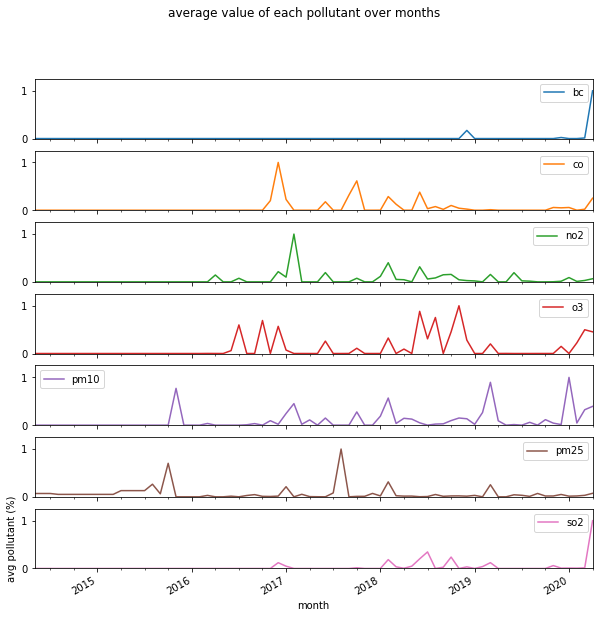

In [ ]:
gaq_viz = gaq[['pollutant','value']].reset_index().set_index(['timestamp','pollutant'])
gaq_viz = gaq_viz.pivot_table(index='timestamp', columns='pollutant', aggfunc='mean').fillna(0)
gaq_viz.columns = gaq_viz.columns.droplevel(0)
'''
Membuat fungsi yang memberikan default value 0 ketika value nya di bawah 0 
dan apply ke setiap elemen dari dataset tersebut, 
kemudian menampilkannya sebagai chart
'''
def default_val(val):
 if val < 0:
   return 0
 else:
   return val
'''
Default value if value < 0 then 0, 
kemudian menghasilkan % value = value/max(value)
'''
line1 = gaq_viz.resample('M').mean().ffill().applymap(lambda x: default_val(x)).apply(lambda x: x/x.max())
line1.plot(
   title = 'average value of each pollutant over months',
   figsize = (10,10),
   ylim = (0,1.25),
   subplots = True
)

plt.ylabel('avg pollutant (%)')
plt.xlabel('month')
plt.show()

AxesSubplot(0.125,0.125;0.775x0.755)


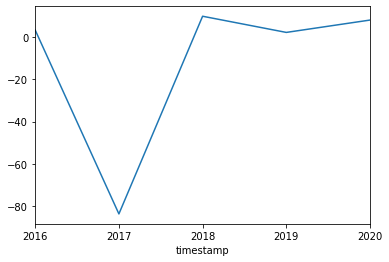

In [ ]:
rerata = gaq.loc[gaq['pollutant'] == 'so2','value'].resample('A').mean().plot()
print(rerata)